# Netflix TV Show and Movies Analysis

### This Netflix TV Show and Movies Data Analysis project seeks to answer the following questions
###### 1 How many movies and TV shows are included in the Netflix dataset?
###### 2 Which countries contribute the most content to Netflix?
###### 3 How has the number of Netflix releases changed over the years?
###### 4 What is the distribution of content ratings on Netflix?
###### 5 Who are the top directors with the most content available on Netflix?
###### 6 What are the top genres of content available on Netflix?
###### 7 What percentage of content on Netflix is movies vs. TV shows?
###### 8 What are the oldest and newest releases in the Netflix dataset?
###### 9 How do the number of content additions vary across different months and years?

In [ ]:
#Importing relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [73]:
df = pd.read_csv('netflix.csv')

In [74]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."


In [75]:
#Checking for null values

df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.0+ KB


#### Replacing NaN values with column modal value

In [76]:
df['director'] = df['director'].fillna(df['director'].mode()[0])

df['country'] = df['country'].fillna(df['country'].mode()[0])

df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])

df['cast'] = df['cast'].fillna(df['cast'].mode()[0])

### How many movies and TV shows are available in the dataset?

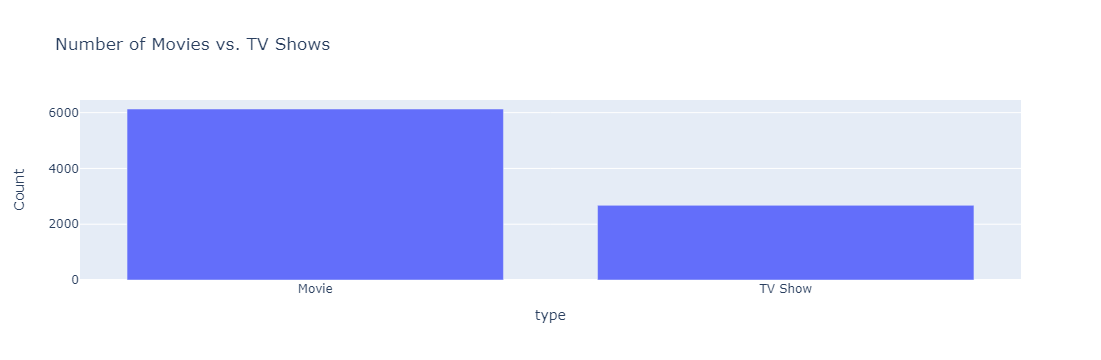

In [77]:
show_types_count = df['type'].value_counts()
fig = px.bar(show_types_count, x=show_types_count.index, y=show_types_count.values,
             labels={'x': 'Show Type', 'y': 'Count'}, title='Number of Movies vs. TV Shows')
fig.show()

###  What are the top 10 countries with the most content available?

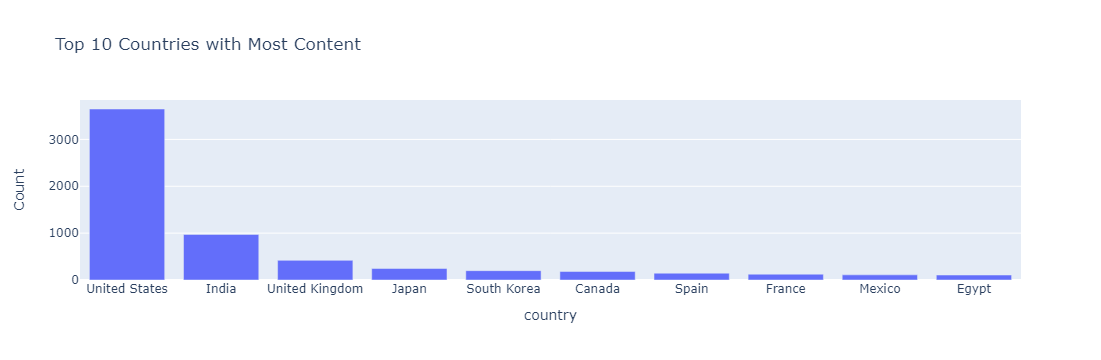

In [78]:

top_countries = df['country'].value_counts().head(10)
fig = px.bar(top_countries, x=top_countries.index, y=top_countries.values,
             labels={'x': 'Country', 'y': 'Count'}, title='Top 10 Countries with Most Content')
fig.show()


### How has the number of Netflix releases evolved over the years?

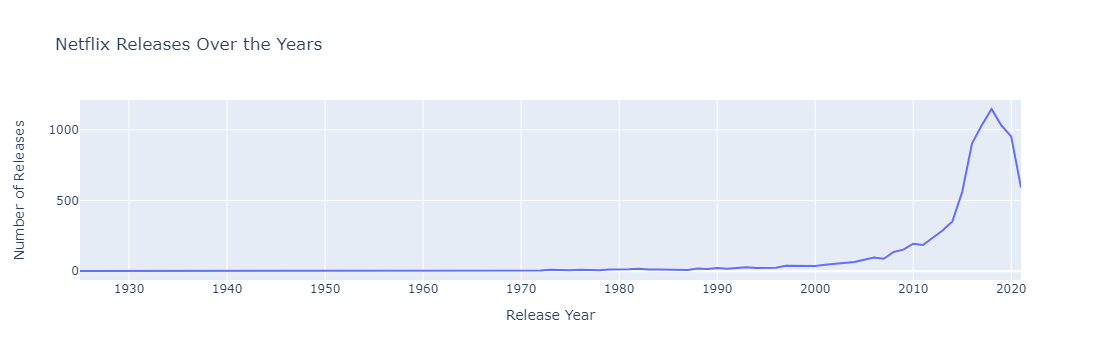

In [79]:


release_years_count = df['release_year'].value_counts().sort_index()
fig = px.line(x=release_years_count.index, y=release_years_count.values,
              labels={'x': 'Release Year', 'y': 'Number of Releases'}, title='Netflix Releases Over the Years')
fig.show()


### What is the distribution of content ratings?

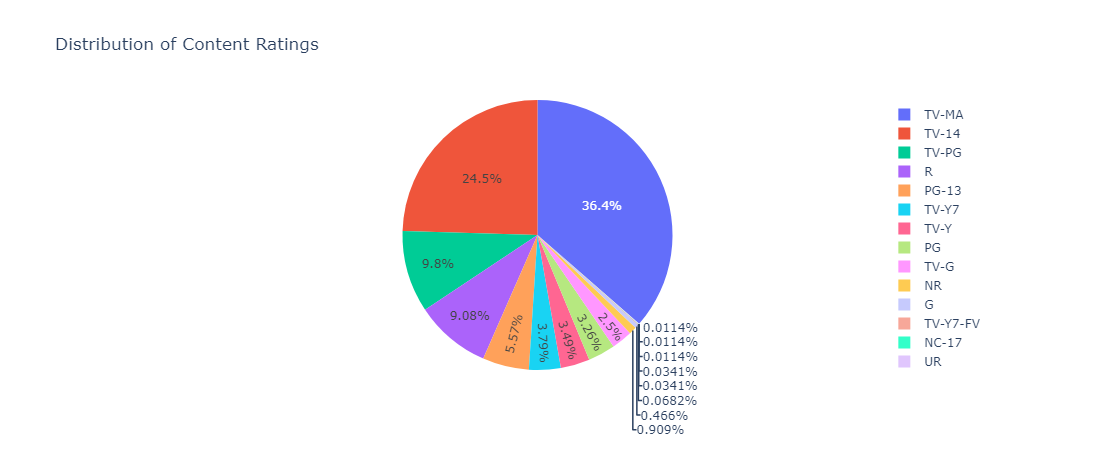

In [80]:


rating_distribution = df['rating'].value_counts()
fig = px.pie(rating_distribution, values=rating_distribution.values, names=rating_distribution.index,
             title='Distribution of Content Ratings')
fig.update_layout(width=600, height=450)
fig.show()


### Which director has the most content on Netflix?

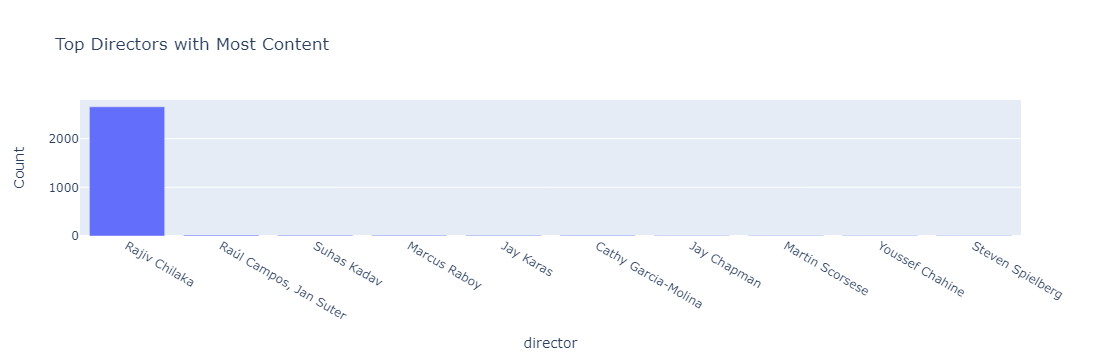

In [81]:


top_directors = df['director'].value_counts().head(10)
fig = px.bar(top_directors, x=top_directors.index, y=top_directors.values,
             labels={'x': 'Director', 'y': 'Count'}, title='Top Directors with Most Content')
fig.show()


### What are the top 10 genres of Netflix content?

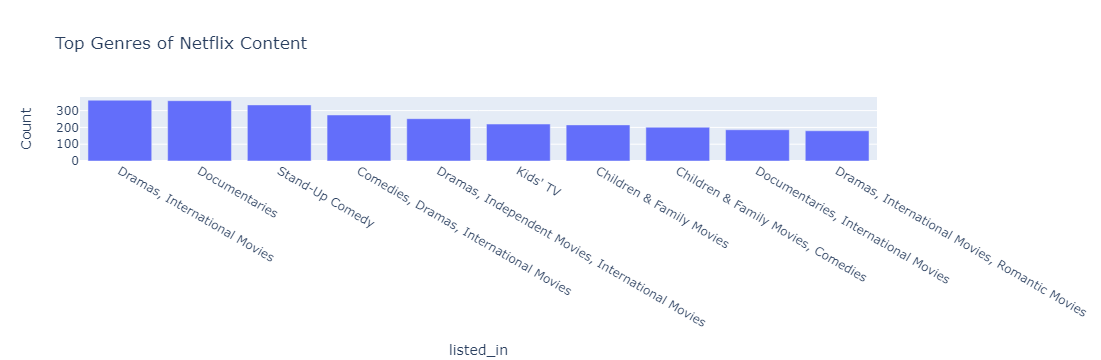

In [83]:


top_genres = df['listed_in'].value_counts().head(10)
fig = px.bar(top_genres, x=top_genres.index, y=top_genres.values,
             labels={'x': 'Genre', 'y': 'Count'}, title='Top Genres of Netflix Content')
fig.show()


### What is the percentage of movies vs. TV shows in the dataset?

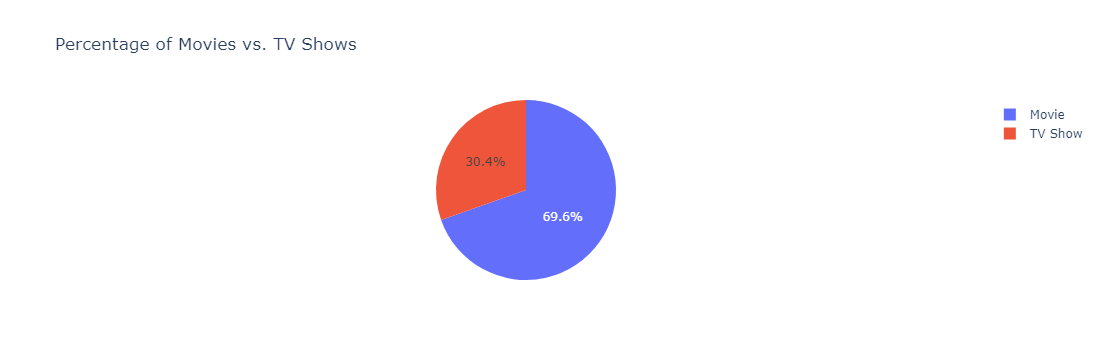

In [94]:


show_type_percentage = df['type'].value_counts(normalize=True) * 100
fig = px.pie(values=show_type_percentage.values, names=show_type_percentage.index,
             title='Percentage of Movies vs. TV Shows')
fig.show()


### Which are the oldest and newest releases on Netflix?

In [85]:


oldest_release = df.loc[df['release_year'].idxmin(), ['title', 'release_year']]
newest_release = df.loc[df['release_year'].idxmax(), ['title', 'release_year']]
print('Oldest Release:', oldest_release)
print('Newest Release:', newest_release)


Oldest Release: title           Pioneers: First Women Filmmakers*
release_year                                 1925
Name: 4250, dtype: object
Newest Release: title           Blood & Water
release_year             2021
Name: 1, dtype: object


In [91]:
#Removing empty spaces from the "Date-Add" column as part of data cleaning process

df['date_added'] = df['date_added'].str.strip()

### How has the number of content additions varied over different months and years?

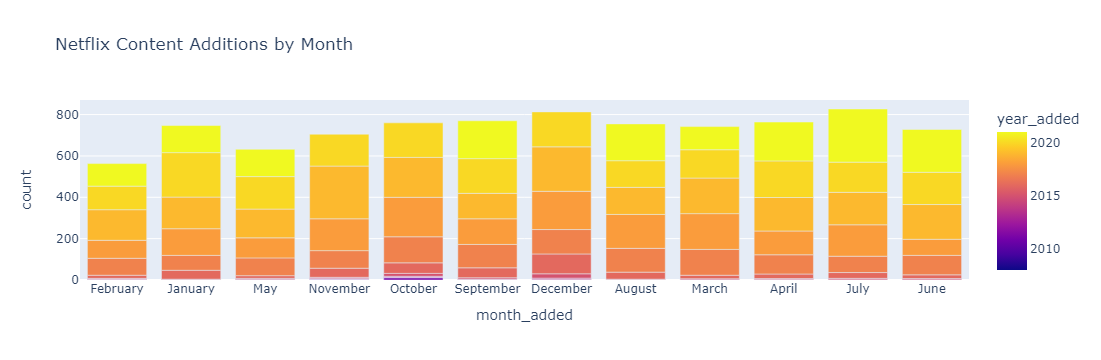

In [92]:


df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

monthly_additions = df.groupby(['year_added', 'month_added']).size().reset_index(name='count')
fig = px.bar(monthly_additions, x='month_added', y='count', color='year_added',
             labels={'x': 'Month', 'y': 'Number of Additions'}, title='Netflix Content Additions by Month')
fig.show()
